In [1]:
from utility import dse, parse_pickle, plot
import pickle
import matplotlib.pyplot as plt
import numpy as np

histories_multi_fidelity = parse_pickle.parse_pickle('v0.1')
histories_single_fidelity = parse_pickle.parse_pickle('single_fidelity_v0.1', strategy='single_fidelity')
histories_random = parse_pickle.parse_pickle('random_v0.1', strategy='random')

curve_multi_fidelity = plot.get_curve(histories_multi_fidelity, strategy='multi_fidelity')
curve_single_fidelity = plot.get_curve(histories_single_fidelity, strategy='single_fidelity')
curve_random = plot.get_curve(histories_random, strategy='random')


(DEBUG) 2023-04-10 23:42:44,257 [logger.py:40] logger init.
(INFO) 2023-04-10 23:42:44,259 [logger.py:42] Logfile /home/chenyiqi/wafer_scale_chip_dse_framework/log/DSE4WSE_2023-04-10-23-42-44-257648.log


In [ ]:
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('deep')
plt.figure(figsize=(10,6), tight_layout=True)

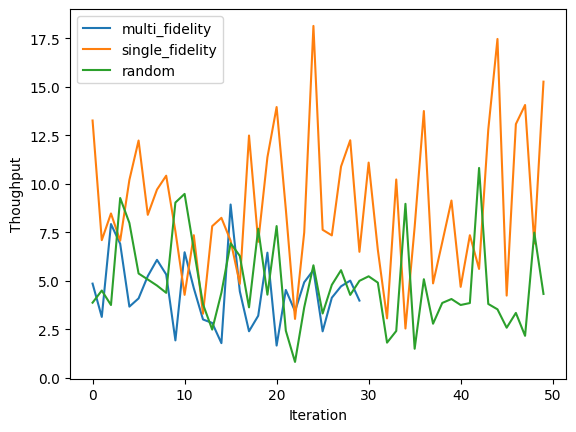

In [3]:
plt.plot(np.arange(len(curve_multi_fidelity[0])), -curve_multi_fidelity[0], label='multi_fidelity')
plt.plot(np.arange(len(curve_single_fidelity)), -curve_single_fidelity, label='single_fidelity')
plt.plot(np.arange(len(curve_random)), -curve_random, label='random')

plt.xlabel('Iteration')
plt.ylabel('Thoughput')

plt.legend()
plt.show()

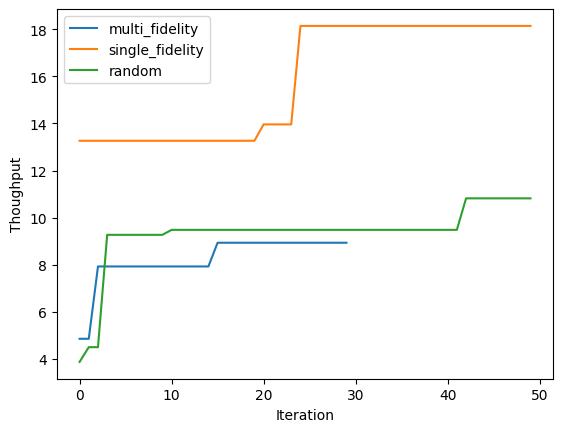

In [4]:
curve_multi_fidelity_max = np.zeros(len(curve_multi_fidelity[0]))
curve_single_fidelity_max = np.zeros(len(curve_single_fidelity))
curve_random_max = np.zeros(len(curve_random))

for i in range(len(curve_multi_fidelity[0])):
    curve_multi_fidelity_max[i] = min(curve_multi_fidelity[0][:i+1])
for i in range(len(curve_single_fidelity)):
    curve_single_fidelity_max[i] = min(curve_single_fidelity[:i+1])
for i in range(len(curve_random)):
    curve_random_max[i] = min(curve_random[:i+1])

plt.plot(np.arange(len(curve_multi_fidelity_max)), -curve_multi_fidelity_max, label='multi_fidelity')
plt.plot(np.arange(len(curve_single_fidelity_max)), -curve_single_fidelity_max, label='single_fidelity')
plt.plot(np.arange(len(curve_random_max)), -curve_random_max, label='random')

plt.xlabel('Iteration')
plt.ylabel('Thoughput')

plt.legend()
plt.show()